## 分词

### 分词的基本概念：正向最大法、逆向最大法、双向匹配法
#### 1.正向最大法
正向即从前往后取词，从7->1，每次减一个字，直到词典命中或剩下1个单字。
>第1次：“我们在野生动物”，扫描7字词典，无
第2次：“我们在野生动”，扫描6字词典，无
。。。。
第6次：“我们”，扫描2字词典，有
扫描中止，输出第1个词为“我们”，去除第1个词后开始第2轮扫描，即：

>第2轮扫描：
第1次：“在野生动物园玩”，扫描7字词典，无
第2次：“在野生动物园”，扫描6字词典，无
。。。。
第6次：“在野”，扫描2字词典，有
扫描中止，输出第2个词为“在野”，去除第2个词后开始第3轮扫描，即：

>第3轮扫描：
第1次：“生动物园玩”，扫描5字词典，无
第2次：“生动物园”，扫描4字词典，无
第3次：“生动物”，扫描3字词典，无
第4次：“生动”，扫描2字词典，有
扫描中止，输出第3个词为“生动”，第4轮扫描，即：

>第4轮扫描：
第1次：“物园玩”，扫描3字词典，无
第2次：“物园”，扫描2字词典，无
第3次：“物”，扫描1字词典，无
扫描中止，输出第4个词为“物”，非字典词数加1，开始第5轮扫描，即：

>第5轮扫描：
第1次：“园玩”，扫描2字词典，无
第2次：“园”，扫描1字词典，有
扫描中止，输出第5个词为“园”，单字字典词数加1，开始第6轮扫描，即：

>第6轮扫描：
第1次：“玩”，扫描1字字典词，有
扫描中止，输出第6个词为“玩”，单字字典词数加1，整体扫描结束。
正向最大匹配法，最终切分结果为：“我们/在野/生动/物/园/玩”

#### 逆向最大匹配法
逆向即从后往前取词，其他逻辑和正向相同。即：

>第1轮扫描：“在野生动物园玩”
第1次：“在野生动物园玩”，扫描7字词典，无
第2次：“野生动物园玩”，扫描6字词典，无
。。。。
第7次：“玩”，扫描1字词典，有
扫描中止，输出“玩”，单字字典词加1，开始第2轮扫描

>第2轮扫描：“们在野生动物园”
第1次：“们在野生动物园”，扫描7字词典，无
第2次：“在野生动物园”，扫描6字词典，无
第3次：“野生动物园”，扫描5字词典，有
扫描中止，输出“野生动物园”，开始第3轮扫描

>第3轮扫描：“我们在”
第1次：“我们在”，扫描3字词典，无
第2次：“们在”，扫描2字词典，无
第3次：“在”，扫描1字词典，有
扫描中止，输出“在”，单字字典词加1，开始第4轮扫描

>第4轮扫描：“我们”
第1次：“我们”，扫描2字词典，有
扫描中止，输出“我们”，整体扫描结束。
逆向最大匹配法，最终切分结果为：“我们/在/野生动物园/玩

#### 双向最大匹配法
正向最大匹配法和逆向最大匹配法，都有其局限性，我举得例子是正向最大匹配法局限性的例子，逆向也同样存在（如：长春药店，逆向切分为“长/春药店”），因此有人又提出了双向最大匹配法，双向最大匹配法。即，两种算法都切一遍，然后根据大颗粒度词越多越好，非词典词和单字词越少越好的原则，选取其中一种分词结果输出。

>如：“我们在野生动物园玩”

    正向最大匹配法，最终切分结果为：“我们/在野/生动/物/园/玩”，其中，两字词3个，单字字典词为2，非词典词为1。
    逆向最大匹配法，最终切分结果为：“我们/在/野生动物园/玩”，其中，五字词1个，两字词1个，单字字典词为2，非词典词为0。

    非字典词：正向(1)>逆向(0)（越少越好）
    单字字典词：正向(2)=逆向(2)（越少越好）
    总词数：正向(6)>逆向(4)（越少越好）

因此最终输出为逆向结果。

### 词频统计
为快速运行，使用样本较少的验证集进行词频统计

In [11]:
import pandas as pd
import jieba
import numpy as np

In [2]:
data = pd.read_csv('./cnews/cnews.val.txt', sep='\t', encoding='utf-8', header=None, names=['label','content'])
data.head(1)

,label,content
0,体育,黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛...


In [3]:
content = data.content.values.tolist()

segments = []

for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg != '\r\n':
                segments.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/sr/qrwj9nk92555240wtx2w98wh0000gn/T/jieba.cache
Loading model cost 0.805 seconds.
Prefix dict has been built succesfully.


In [5]:
word_df = pd.DataFrame({'segments':segments})
word_df.head(2)

,segments
0,黄蜂
1,vs


In [8]:
#停用词
stop_words = pd.read_csv('./cnews/stopwords.txt', index_col = False, quoting=3, sep='\t',
                        names = ['stopword'], encoding='utf-8')
stop_words.head(2)

,stopword
0,!
1,""""


In [14]:
#去除停用词
word_df = word_df[~word_df.segments.isin(stop_words.stopword)]
word_df.head(2)

,segments
0,黄蜂
2,湖人


In [15]:
#统计词频
words_stats = word_df.groupby('segments')['segments'].agg({'计数':np.size}).reset_index()
words_stats = words_stats.sort_values(by='计数',ascending=False)
words_stats.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,segments,计数
41988,基金,9828
49086,市场,4436
22561,中国,3948
30112,公司,3304
26669,企业,2530


In [28]:
#做词云
from wordcloud import  WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(font_path = './cnews/simhei.ttf', #指定字体
                        max_font_size=80,      #最大字号                 
                       background_color = 'white') #背景颜色

In [16]:
words_stats.head(5).values 

array([['基金', 9828],
       ['市场', 4436],
       ['中国', 3948],
       ['公司', 3304],
       ['企业', 2530]], dtype=object)

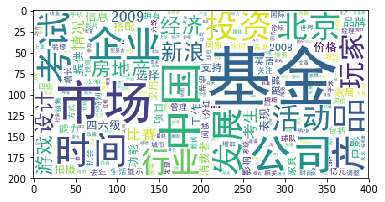

In [29]:
word_freq = {x[0]:x[1] for x in words_stats.head(500).values}
word_pic = word_cloud.fit_words(word_freq)
plt.imshow(word_pic)

### 语言模型中unigram、bigram、trigram的概念

    unigram 一元分词，把句子分成一个一个的汉字
    bigram 二元分词，把句子从头到尾每两个字组成一个词语
    trigram 三元分词，把句子从头到尾每三个字组成一个词语.

In [30]:
word_freq

{'基金': 9828,
 '市场': 4436,
 '中国': 3948,
 '公司': 3304,
 '企业': 2530,
 '时间': 2502,
 '考试': 2419,
 '产品': 2416,
 '投资': 2288,
 '发展': 2286,
 '北京': 2099,
 '活动': 2058,
 '行业': 2050,
 '玩家': 1822,
 '新浪': 1818,
 '设计': 1744,
 '经济': 1698,
 '房地产': 1649,
 '游戏': 1647,
 '比赛': 1641,
 '情况': 1602,
 '考生': 1539,
 '2009': 1527,
 '四六级': 1515,
 '品牌': 1483,
 '2008': 1470,
 '选择': 1397,
 '消费者': 1380,
 '信息': 1360,
 '价格': 1353,
 '电影': 1327,
 '工作': 1322,
 '功能': 1265,
 '表现': 1254,
 '提供': 1236,
 '能力': 1197,
 '拍摄': 1176,
 '项目': 1170,
 '支持': 1140,
 '搭配': 1113,
 '英语': 1102,
 '家居': 1090,
 '家具': 1090,
 '股票': 1089,
 '采用': 1084,
 '影响': 1069,
 '去年': 1066,
 '生活': 1047,
 '亿元': 1047,
 '管理': 1045,
 '希望': 1040,
 '包括': 1036,
 '显示': 1029,
 '国家': 1001,
 '拥有': 1000,
 '阅读': 982,
 '特别': 976,
 '机会': 967,
 '分红': 961,
 '增长': 959,
 '球队': 958,
 '四级': 955,
 '装修': 954,
 '销售': 950,
 '全国': 944,
 '国际': 927,
 '关注': 916,
 '方式': 912,
 '橱柜': 904,
 '时尚': 899,
 '像素': 896,
 '公布': 893,
 '超过': 891,
 '增加': 889,
 '美国': 884,
 '调整': 883,
 '系统': 880,
 '热火': 873,
 '

In [31]:
from collections import Counter

In [35]:
Counter(segments).most_common(4)

[('基金', 9828), ('我们', 6398), ('一个', 4856), ('可以', 4600)]

In [39]:
all_data = []
for c in content:
    all_data.extend(c)

Counter(all_data).most_common(10)

[('，', 162847),
 ('的', 121165),
 (' ', 84037),
 ('。', 69108),
 ('e', 43422),
 ('0', 42685),
 ('一', 35978),
 ('是', 33143),
 ('在', 30254),
 ('t', 29203)]

#### 每篇文档向量化
[CountVectorizer参考文档](https://blog.csdn.net/mmc2015/article/details/46866537)

In [40]:
data.head(1)

,label,content
0,体育,黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛...


In [42]:
content[:1]

['黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛首轮洛杉矶湖人主场迎战新奥尔良黄蜂，此前的比赛中，双方战成2-2平，因此本场比赛对于两支球队来说都非常重要，赛前双方也公布了首发阵容：湖人队：费舍尔、科比、阿泰斯特、加索尔、拜纳姆黄蜂队：保罗、贝里内利、阿里扎、兰德里、奥卡福[新浪NBA官方微博][新浪NBA湖人新闻动态微博][新浪NBA专题][黄蜂vs湖人图文直播室](新浪体育)']

In [44]:
label = data.label.values.tolist()
label[:1]

['体育']

In [47]:
stopword = stop_words.stopword.values.tolist()
stopword[:5]

['!', '"', '#', '$', '%']

In [73]:
#去除停用词
def preprocess_text(content,label,result):
    for i in range(len(content)):
        try:
            segs = jieba.lcut(content[i])
            segs = filter(lambda x: len(x)>1, segs)
            segs = filter(lambda x: x not in stopword, segs)
            result.append((" ".join(segs), label[i]))
        except:
            print(content[i])
            continue

In [74]:
result = []
preprocess_text(content,label,result)

In [75]:
result[:1]

[('黄蜂 湖人 首发 科比 带伤 保罗 加索尔 救赎 之战 新浪 体育讯 北京 时间 NBA 季后赛 首轮 洛杉矶 湖人 主场 迎战 新奥尔良 黄蜂 此前 比赛 战成 本场 比赛 两支 球队 赛前 公布 首发 阵容 湖人队 费舍尔 科比 阿泰斯特 加索尔 拜纳姆 黄蜂队 保罗 贝里 内利 阿里 兰德 奥卡福 新浪 NBA 官方 微博 新浪 NBA 湖人 新闻动态 微博 新浪 NBA 专题 黄蜂 湖人 图文 直播室 新浪 体育',
  '体育')]

In [76]:
x,y = zip(*result)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer


'''CountVectorizer可以去除停用词，前面已经去除过，这里不再重复去除'''
#analyzer参数 : string, {‘word’, ‘char’, ‘char_wb’} or callable：特征基于wordn-grams还是character n-grams。如果是callable是自己复写的从the raw, unprocessed input提取特征的函数。
#stop_words参数：
                        #CountVectorizer(stop_words=stopword) 去除指定停用词
                        #CountVectorizer(stop_words='english') 如果是英文文档，直接去除英文停用词

vec = CountVectorizer(analyzer='word',max_features=1000)

In [80]:
print(vec.transform(x))

  (0, 30)	4
  (0, 98)	1
  (0, 160)	1
  (0, 161)	1
  (0, 171)	2
  (0, 196)	1
  (0, 247)	2
  (0, 252)	1
  (0, 377)	1
  (0, 387)	1
  (0, 579)	5
  (0, 598)	1
  (0, 623)	1
  (0, 652)	1
  (0, 655)	2
  (0, 675)	4
  (0, 676)	1
  (0, 703)	1
  (0, 746)	2
  (0, 955)	1
  (0, 985)	2
  (0, 987)	1
  (1, 30)	2
  (1, 41)	1
  (1, 46)	1
  :	:
  (4999, 654)	1
  (4999, 657)	3
  (4999, 661)	1
  (4999, 668)	2
  (4999, 689)	1
  (4999, 728)	5
  (4999, 738)	1
  (4999, 760)	1
  (4999, 765)	2
  (4999, 787)	4
  (4999, 788)	2
  (4999, 797)	2
  (4999, 822)	2
  (4999, 823)	10
  (4999, 846)	7
  (4999, 874)	1
  (4999, 897)	1
  (4999, 926)	1
  (4999, 932)	1
  (4999, 938)	1
  (4999, 956)	1
  (4999, 958)	2
  (4999, 972)	1
  (4999, 974)	1
  (4999, 984)	1
